# Современные методы анализа данных и машинного обучения, БИ

## НИУ ВШЭ, 2023-24 учебный год

### Домашнее задание №2. Математическая оптимизация

Задание выполнил(а):

    Ильичев Олег

### Общая информация

__Дата выдачи:__ 11.06.2024

__Дедлайн:__ 04:00 18.06.2024

### Оценивание и штрафы

Количество баллов за каждую задачу данного домашнего задания указано рядом с условием задачи.

Оценка за домашнее задание вычисляется по следующей формуле:

$$
s \times 10/34 ,
$$

где $s$  — количество баллов, которое вы набрали в сумме по всем задачам.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 **вторичный** балл в день, но  задержка не может быть больше недели.

**Важно:** В этом домашнем задании предусмотрено несколько заданий, за которые можно получить бонусные баллы. Бонусные баллы прибавляются к обычным баллам, и может выйти так, что ваша итоговая оценка станет больше 10. В таком случае именно это и будет являться вашей оценкой. То есть за это ДЗ **можно** получить больше 10

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

Кроме того, не забывайте, что все решения прогоняются через специальную новую систему антиплагиата для юпитеровских ноутбуков, которая детектирует перекрестные «похожести» между разными ноутбуками, а также решения, сгенерированные нейросетью. Подобные работы также в обязательном порядке будут расцениваться исключительно как плагиат.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/). Необходимо загружать файл с расширением .ipynb (питоновский ноутбук)

Инвайт для подключения к странице курса в системе — указан для каждой группы в нашем телеграмм-канале.

### О задании

В данном задании мы потренируемся в работе с математическим анализом и методами математической оптимизации, чёткое понимание которых совершенно необходимо в рамках любой задачи и для любой модели в машинном обучении.

В первой части задания мы будем с вами работать со следующей функцией:

$$y(x) = x^{3} \ln(x)$$

### Задание 1


#### 1.1. (1 балл)

Посчитайте производную данной функции аналитически. Для этого либо воспользуйтесь листком бумаги и прикрепите сюда фотографию, либо используйте язык разметки LaTeX — он поддерживается в юпитеровских ноутбуках.

In [ ]:
# HEIC и jpg не читаются колабом загрузил сюда: https://imgur.com/a/LBBBbah

In [ ]:
https://imgur.com/a/LBBBbah

#### 1.2. (2 балла)

Напишите программную функцию `f(x)`, которая бы вычисляла значение нашей функции в точке и возвращала бы это значение в качестве ответа; и напишите программную функцию `df(x)`, которая бы вычисляла значение производной нашей функции в точке и возвращала бы это значение в качестве ответа.

Обязательно сделайте проверку всех функций на какой-нибудь конкретной точке. Убедитесь, что ответы вашего предыдущего пункта (на листочке) и программного в этом плане полностью совпадают.

In [2]:
import numpy as np

In [3]:
def f(x):
  return x**3 * np.log(x)

In [4]:
def df(x):
  return x**2 * (3 * np.log(x) + 1)

#### 1.3. (2 балла)

Визуализируйте нашу функцию (постройте график).

In [5]:
import matplotlib.pyplot as plt

In [7]:
x = np.linspace(0.1, 10, 100)
y = f(x)

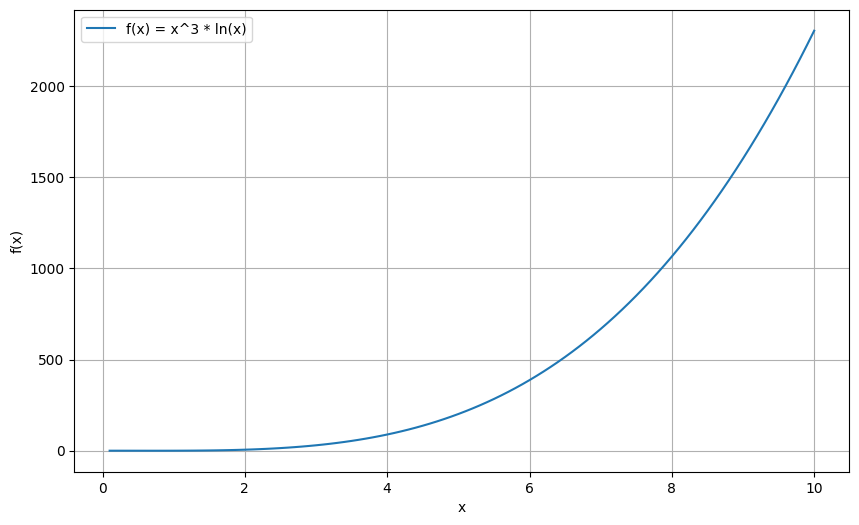

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, label = 'f(x) = x^3 * ln(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, which='both')
plt.legend()
plt.show()

In [9]:
x = np.linspace(0.1, 10, 100)
y = df(x)

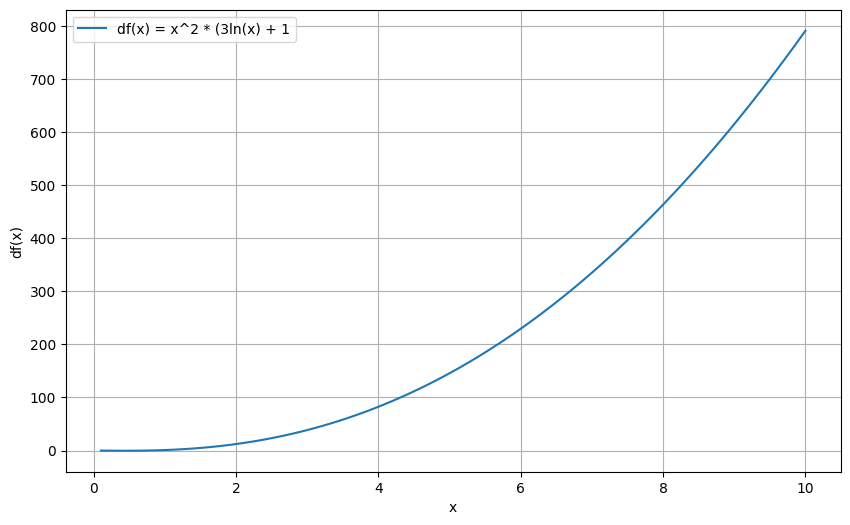

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, label = 'df(x) = x^2 * (3ln(x) + 1')
plt.xlabel('x')
plt.ylabel('df(x)')
plt.grid(True, which='both')
plt.legend()
plt.show()

### Задание 2

#### 2.1. (4 балла)

Реализуйте функцию `get_min_with_gd`, которая принимает на вход начальную точку $x_0$, число шагов, `lr` и `threshold`; внутри себя производит поиск минимума при помощи градиентного спуска; и возвращает последовательность точек, полученных на каждом шаге.

In [11]:
def get_min_with_gd(x0, num_steps, lr, threshold):
    x = x0
    result = [x]

    for step in range(num_steps):
        grad = df(x)
        new_x = x - lr * grad
        result.append(new_x)

        if abs(new_x - x) < threshold:
            break

        x = new_x

    return result

#### 2.2. (2 балла)

Запустите поиск минимума с нескольких любых точек (не менее 3).

Проверьте, что все работает ожидаемым образом, отрисовав график изменения координаты точки, в зависимости от итерации градиентного спуска, для каждого запуска.

In [12]:
init = [1, 2, 3, 4, 5, 10]
num_steps = 100
lr = 0.01
threshold = 0.0001

In [13]:
result = [get_min_with_gd(x0, num_steps, lr, threshold) for x0 in init]

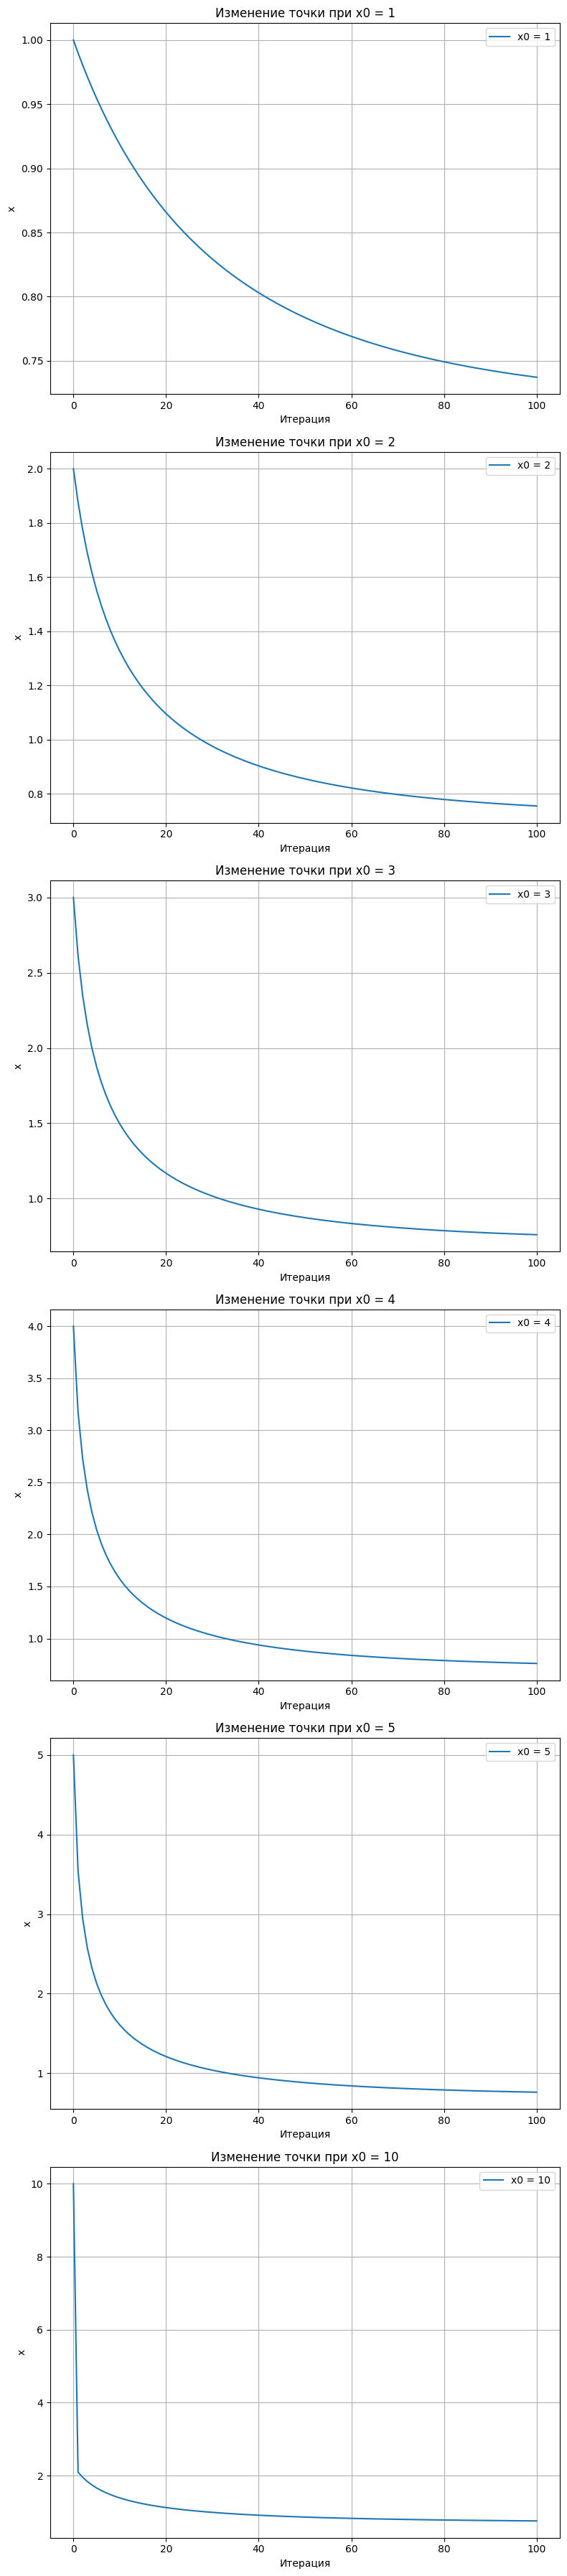

In [14]:
fig, axes = plt.subplots(len(init), 1, figsize=(8, 6 * len(init)))

for i, (ax, res) in enumerate(zip(axes, result)):
    ax.plot(res, label=f'x0 = {init[i]}')
    ax.set_title(f'Изменение точки при x0 = {init[i]}')
    ax.set_xlabel('Итерация')
    ax.set_ylabel('x')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

#### 2.3. (3 балла)

Отрисуйте график самой функции еще раз. На данный график нанесите движение алгоритма от исходных точек к финальной точке разными цветами. Нанесите на график истинный минимум отдельной точкой и подпишите его (в виде текста на графике).

In [15]:
x = np.linspace(0.1, 10, 1000)
y = f(x)

In [ ]:
# HEIC и jpg не читаются колабом загрузил сюда: https://imgur.com/a/LJQb1uS

In [ ]:
https://imgur.com/a/LJQb1uS

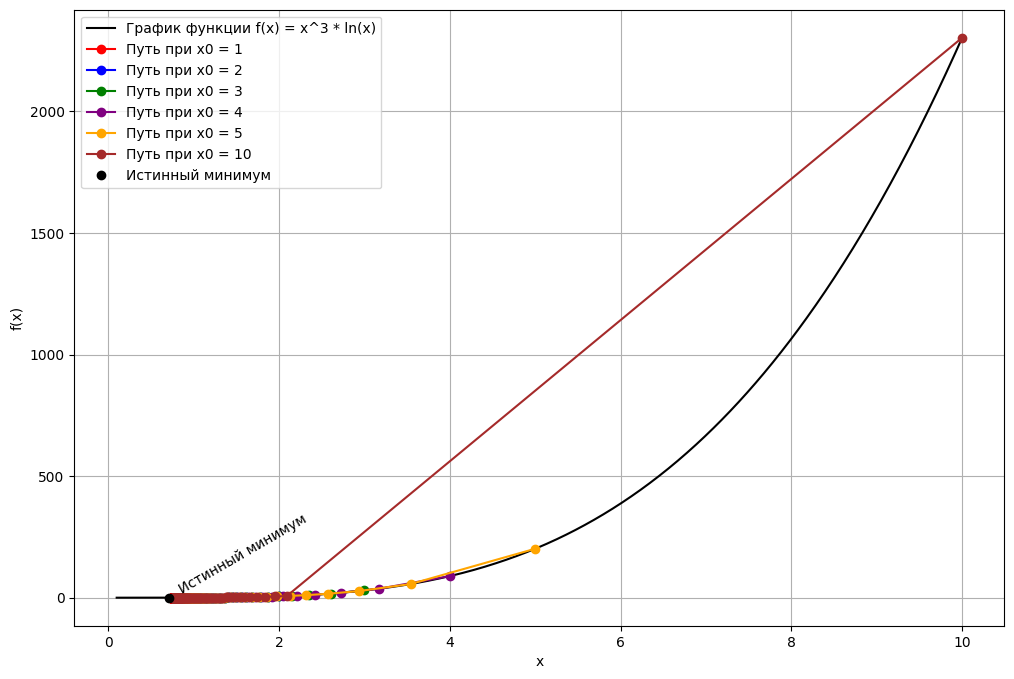

In [16]:
plt.figure(figsize=(12, 8))
plt.plot(x, y, label='График функции f(x) = x^3 * ln(x)', color='black')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, which='both')

colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']
for res, color, x0 in zip(result, colors, init):
    res_y = f(np.array(res))
    plt.plot(res, res_y, marker='o', linestyle='-', color=color, label=f'Путь при x0 = {x0}')

min_x = np.exp(-1/3)
min_y = f(min_x)
plt.plot(min_x, min_y, 'ko', label='Истинный минимум')
plt.text(min_x, min_y, f'  Истинный минимум', rotation=30)


plt.legend()
plt.show()

### Задание 3

Начиная с задания 3, мы будем работать с другими функциями.

Пусть

$$f = \log((e^x + e^{-2x}) \cdot(e^{y + 1} + 0.5\cdot e ^{-y}))$$

#### 3.1. (1 балл и 2 бонусных балла)

Верно ли, что $f$ имеет единственную точку локального минимума, причем этот локальный минимум также является и глобальным? Почему да или почему нет? Докажите ваш ответ!

*Примечание. В данном задании графическое доказательство оценивается в 1 балл; строгое математическое доказательство оценивается в 2 бонусных балла.*

In [17]:
def ff(x, y):
  return np.log((np.exp(x) + np.exp(-2*x)) * (np.exp(y+1) + 0.5 * np.exp(-y)))

In [18]:
def dffx(w):
  x, y = w
  return ((np.exp(x) - 2 * np.exp(-2*x)) / (np.exp(x) + np.exp(-2*x)))
def dffy(w):
  x, y = w
  return ((np.exp(y+1) - 0.5 * np.exp(-y)) / (np.exp(y+1) + 0.5 * np.exp(-y)))

In [19]:
def dff(w):
  return np.array([dffx(w), dffy(w)])

In [ ]:
# HEIC и jpg не читаются колабом загрузил сюда: https://imgur.com/a/5eT8hd6

In [ ]:
https://imgur.com/a/5eT8hd6

In [ ]:
# Про графическое доказательство - не понимаю, типо просто отметить точку минимума на 3d графике? Но это же не доказательство от слова соовсем
# Просто ткнуть пальцем в точку условно на двух 2d визуализациях и если эта точка совпадет, значит это точка минимума - это же ни разу не доказательство,
# Нам же тогда буквально нужно проверить бесконечное колво точек (x, y) чтобы прийти к выводу,
# что какая-то точка является минимумом, темболее глобальным, а зачем проверять каждую точку когда есть градиенты?
# Максимкм что можно сделать графически - визуализировать аналитическое доказательство
# Вообщем оставил аналитическое доказательство, считаю что графическое док-во тут неуместно и невозможно (либо я не понимаю о чем речь)

#### 3.2. (3 балла и 2 бонусных балла)

Придумайте какие-нибудь функции $g$ и $h$ от двух переменных, такие что
- функция $g$ не имеет глобального минимума (не ограничена снизу);
- функция $h$ имеет по крайней мере два локальных минимума, неравных друг другу.

Докажите, что ваши функции удовлетворяют заявленным критериям.

*Примечание. В данном задании графическое доказательство оценивается в рамках основных баллов; строгое математическое доказательство оценивается в 2 бонусных балла.*

In [ ]:
# тут опять же не понимаю как можно говорить о графическом доказательстве, если все основывается на свойствах функций
# g(x, y) = x * y
# h(x, y) = -x^3 * y^3 + x^2 * y^2 + xy
# В качетве графического "доказательства": https://www.desmos.com/3d?lang=ru

In [20]:
def g(x, y):
  return x * y

In [21]:
def h(x, y):
  return -x**3 * y**3 + x**2 * y**2 + x*y

In [ ]:
# HEIC и jpg не читаются колабом загрузил сюда: https://imgur.com/a/RMZbo6m <- для функции g

In [ ]:
https://imgur.com/a/RMZbo6m

In [ ]:
# HEIC и jpg не читаются колабом загрузил сюда: https://imgur.com/a/CcMS6lt <- для функции h

In [ ]:
https://imgur.com/a/CcMS6lt

In [ ]:
# Функция g - линейная, определена на (-oo; +oo) при x из (-oo; +oo) и y из (-oo; +oo), и каждый раз когжда мы устремляем переменные в
# отличные друг от друга бесконечности (одну в плюс другую в минус) - g уходит в -oo

In [ ]:
# Функция h - оставлю без доказательств, подбирал по графику

#### 3.3. (5 баллов)

Реализуйте функцию `get_min_with_rmsprop`, которая принимает на вход начальную точку $x_0$, число шагов, `lr`, `beta` и `threshold`; внутри себя производит поиск минимума при помощи градиентного спуска с модификацией RMSProp; и возвращает последовательность точек, полученных на каждом шаге.

Напомним, как выглядят формулы для этого алгоритма:

$$g^{n+1} = ∇f(w^{n})$$
$$\gamma^{n+1} = (1 - \beta) \gamma^{n} + \beta (g^{n+1}) ^ 2$$
$$w^{n+1} = w^n - \frac{\alpha}{\sqrt{\gamma^{n+1} + ɛ}}⋅g^{n+1}$$

Здесь $α$ — learning rate, $ɛ$ — малое число (можно взять 0.0001 — оно нужно, чтобы случайно не было деления на 0), $\beta$ — мера учета инерции.



In [1]:
def get_min_with_rmsprop(x0, lr, beta, threshold, grad, num_steps):
    epsilon = 0.0001
    w = np.array(x0, dtype=float)
    gamma = np.zeros_like(w)
    result = [w.copy()]

    for step in range(num_steps):
        g = grad(w)
        gamma = (1 - beta) * gamma + beta * g**2
        w = w - lr / (np.sqrt(gamma) + epsilon) * g
        result.append(w)

        if np.linalg.norm(g) < threshold:
            break

    return result

#### 3.4. (4 балла)

Запустите поиск минимума для всех трёх функций ($f$, $g$, $h$) с нескольких любых точек (не менее 3 — таким образом, минимум 9 запусков).

Проверьте, что все работает ожидаемым образом, отрисовав для каждого запуска график изменения координат точки (2D-график) по мере прохождения градиентного спуск. Все графики строятся на трёх парах осей, размещенных вертикально на одном полотне (свои оси для каждой функции; разные запуски для одной функции изображаются на одних осях).

In [48]:
# Знаю, что есть библиотечка sympy, но решил захардкодить градиенты, так будет нагляднее и смогу отдебажить
# HEIC и jpg не читаются колабом загрузил сюда: https://imgur.com/a/WmA6fcC

In [ ]:
https://imgur.com/a/WmA6fcC

In [23]:
def dgx(w):
  x, y = w
  return y

def dgy(w):
  x, y = w
  return x

In [24]:
def dg(w):
  return np.array([dgx(w), dgy(w)])

In [25]:
def dhx(w):
  x, y = w
  return -3 * x**2 * y**3 + 2 * x * y**2 + y

def dhy(w):
  x, y = w
  return -3 * x**3 * y**2 + 2 * x**2 * y + x

In [26]:
def dh(w):
  return np.array([dhx(w), dhy(w)])

In [27]:
x0_fgh = [[1, 1], [5, 7], [10, 9], [4, 4]]

In [28]:
num_steps = 100
lr = 0.1
beta = 0.9
threshold = 0.000001

In [29]:
res_f = [get_min_with_rmsprop(x0, lr, beta, threshold, dff, num_steps) for x0 in x0_fgh]

In [30]:
res_g = [get_min_with_rmsprop(x0, lr, beta, threshold, dg, num_steps) for x0 in x0_fgh]

In [31]:
res_h = [get_min_with_rmsprop(x0, lr, beta, threshold, dh, num_steps) for x0 in x0_fgh]

#### 3.5. (3 балла)

Отрисуйте графики самих функций еще раз. На данные графики нанесите движение алгоритма от исходных точек к финальной точке разными цветами. Там, где они есть у функции, нанесите на графики истинные локальные минимумы функций в виде отдельных точек, а также подпишите их в виде текста на графике. Все графики строятся на трёх множествах осей, размещенных вертикально на одном полотне — свои оси для каждой функции.

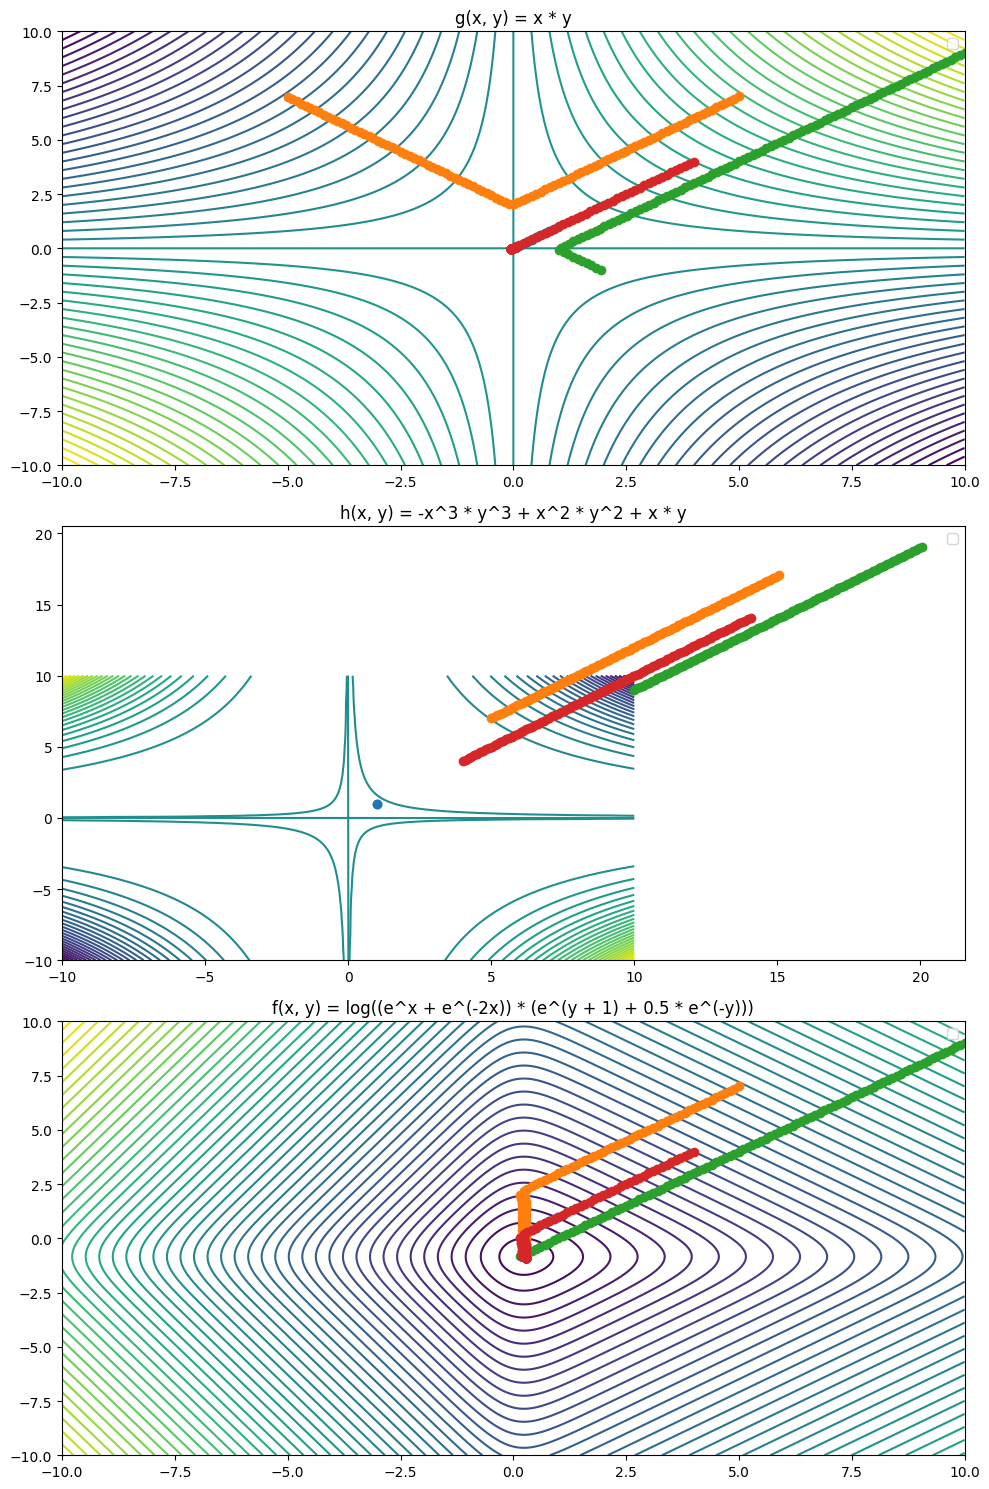

In [32]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

ax = axs[0]
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)
Z = g(X, Y)

ax.contour(X, Y, Z, levels=50)
ax.set_title('g(x, y) = x * y')
for result in res_g:
    res = np.array(result)
    ax.plot(res[:, 0], res[:, 1], marker='o')
ax.legend()

ax = axs[1]
Z = h(X, Y)

ax.contour(X, Y, Z, levels=50)
ax.set_title('h(x, y) = -x^3 * y^3 + x^2 * y^2 + x * y')
for result in res_h:
    res = np.array(result)
    ax.plot(res[:, 0], res[:, 1], marker='o')

ax.legend()

ax = axs[2]
Z = ff(X, Y)

ax.contour(X, Y, Z, levels=50)
ax.set_title('f(x, y) = log((e^x + e^(-2x)) * (e^(y + 1) + 0.5 * e^(-y)))')
for result in res_f:
    res = np.array(result)
    ax.plot(res[:, 0], res[:, 1], marker='o')
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Не уверен что на 2d графиках наглядно видно, но тем не менее
# Локальные минимумы не стал отмечать, тк для g(x, y) их нет, а для h(x, y) - не нашел

### Задание 4

#### Масштабирование на многомерный случай (4 балла)

Удостоверьтесь в том, что ваша функция `get_min_with_rmsprop` из прошлого задания работает не только с функциями от двух переменных, но и с функциями от произвольного числа переменных. При необходимости внесите в функцию корректировки ниже.

Придумайте любую функцию от 5 переменных, у которой есть какой-нибудь минимум (например, самое простое, точка $(0, 0, 0, 0, 0)$) и запустите градиентный спуск с RMSProp для этой функции. Проверьте, что градиентный спуск действительно сходится в правильную точку экстремума.

In [ ]:
# функция 5 переменных: x^2 + y^2 + z^2 + k^2 + r^2 у нее как раз минимум будет в нулях

In [6]:
def xyzkr(x, y, z, k, r):
  return x**2 + y**2 + z**2 + k**2 + r**2

In [7]:
def xyzkrx(w):
  x, y, z, k, r = w
  return 2*x

In [8]:
def xyzkry(w):
  x, y, z, k, r = w
  return 2*y

In [9]:
def xyzkrz(w):
  x, y, z, k, r = w
  return 2*z

In [10]:
def xyzkrk(w):
  x, y, z, k, r = w
  return 2*k

In [11]:
def xyzkrr(w):
  x, y, z, k, r = w
  return 2*r

In [12]:
def dxyzkr(w):
  return np.array([xyzkrx(w), xyzkry(w), xyzkrz(w), xyzkrk(w), xyzkrr(w)])

In [15]:
x0_xyzkr = [[1, 2, 3, 4, 5], [4, 4, 4, 4, 4], [-7, 2, -3, 10, 9]]
lr = 0.1
beta = 0.9
threshold = 1e-6
num_steps = 100

result_xyzkr = [get_min_with_rmsprop(x0, lr, beta, threshold, dxyzkr, num_steps) for x0 in x0_xyzkr]

In [17]:
for res in result_xyzkr:
  for i, w in enumerate(result):
    print(f"Step {i}: {w}\n")

Step 0: [array([1., 2., 3., 4., 5.]), array([0.8945963 , 1.89459352, 2.8945926 , 3.89459213, 4.89459186]), array([0.79521893, 1.7946108 , 2.79442762, 3.79433934, 4.7942874 ]), array([0.69660265, 1.69518294, 2.69477463, 3.69458083, 4.69446766]), array([0.59826666, 1.59584732, 2.59518787, 3.59487992, 4.59470154]), array([0.50022524, 1.49656001, 2.49562268, 3.49519262, 4.49494562]), array([0.40258839, 1.39732158, 2.39607564, 3.39551486, 4.39519567]), array([0.30555927, 1.29813848, 2.29654771, 3.2958467 , 4.29545148]), array([0.20954214, 1.19901922, 2.19704053, 3.19618868, 4.19571329]), array([0.11551512, 1.09997457, 2.09755599, 3.09654142, 4.09598137]), array([0.02688393, 1.00101822, 1.99809625, 2.99690564, 3.99625603]), array([-0.02854192,  0.90216802,  1.89866382,  2.89728209,  3.89653759]), array([0.06305003, 0.80344777, 1.79926159, 2.79767162, 3.79682643]), array([-0.04087589,  0.70489026,  1.69989295,  2.69807519,  3.6971229 ]), array([0.05350935, 0.60654228, 1.60056188, 2.59849382, 

In [ ]:
# пролистав в конец списка - можно видеть, что действительно все значения подошли очень близко к нулю